In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
companies = pd.read_csv('companies.csv', encoding= 'unicode_escape')
rounds2 = pd.read_csv('rounds2.csv', encoding= 'unicode_escape')
mapping = pd.read_csv('mapping.csv', encoding= 'unicode_escape')

In [217]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [218]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [219]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000


In [220]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [221]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

##### Converting permalink to lowercase, would be helpful for merging 

In [222]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

#### How many unique companies are present in rounds2?

In [223]:
len(pd.unique(rounds2.company_permalink))

66370

#### How many unique companies are present in the companies file?

In [224]:
len(pd.unique(companies.permalink))

66368

In [225]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


### There has been few weird characters identified in the permalink & company_permalink columns in both dataframes

In [226]:
import string
import re
alphabet = string.ascii_letters+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [227]:
regex = re.compile('[@_!#$%^&*()<>?|}{~:]') 
regex

re.compile(r'[@_!#$%^&*()<>?|}{~:]', re.UNICODE)

In [228]:
companies[~companies.permalink.str.contains(regex)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


### Not able to find the right regular expression to retrive all the rows with weird/special characters in company_permalink
### Removing non ascii characters from the in both the permalink columns
### Found an article = https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe


In [229]:
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [230]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [231]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000


#### To convert numbers into Thousand, Million, Billion & Trillion

In [232]:
import math

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

### By The above observations we can conclude that Venture Funding would be best suited for Spark Funds as there budget range is 5 million to 15 million USD

#### Cleaning Rounds2 Dataframe

In [233]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

#### Dropping column funding_round_code as it is unnescessary 

In [234]:
rounds2 = rounds2.drop(['funding_round_code'], axis=1) 

In [235]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
dtype: int64

#### Need to fix null values in raised_amount_usd column


In [236]:
# Removing scientific values from the display

pd.options.display.float_format = '{:.0f}'.format

In [237]:
rounds2['raised_amount_usd'].describe()

count         94959
mean       10426869
std       114821248
min               0
25%          322500
50%         1680511
75%         7000000
max     21271935000
Name: raised_amount_usd, dtype: float64

In [238]:
print('Mean: ' + str(millify(rounds2['raised_amount_usd'].mean())))
print('Median: ' + str(millify(rounds2['raised_amount_usd'].median())))

Mean: 10 Million
Median: 2 Million


### As the difference in Mean and Median is too huge, I believe dropping the records would be better option where raised_amount_usd is NULL

In [239]:
rounds2 = rounds2[~np.isnan(rounds2['raised_amount_usd'])]

In [240]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funded_at                94959 non-null  object 
 4   raised_amount_usd        94959 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.3+ MB


In [241]:
rounds2.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

### Converting permalink to lowercase, would be helpful for merging 

In [242]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

### Merging 2 dataframes

In [243]:
master_frame = pd.merge(companies,rounds2,how = 'inner', left_on = companies.permalink, right_on = rounds2.company_permalink)

In [244]:
master_frame.funding_round_type.value_counts()

venture                  50228
seed                     23603
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [245]:
master_frame.head()

,key_0,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000
1,/organization/-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000
2,/organization/-the-one-of-them-inc-,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878
3,/organization/0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000
4,/organization/01games-technology,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250


### Dropping redudant columns from the master frame

In [246]:
master_frame = master_frame.drop(['key_0', 'homepage_url', 'company_permalink','founded_at', 'state_code', 'region', 'city','funding_round_permalink'], axis=1)

In [247]:
master_frame = master_frame[(master_frame.funding_round_type == "venture") | 
                            (master_frame.funding_round_type == "angel") | 
                            (master_frame.funding_round_type == "seed") | 
                            (master_frame.funding_round_type == "private_equity") 
                           ]

In [248]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 94957
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           80627 non-null  object 
 1   name                80626 non-null  object 
 2   category_list       79772 non-null  object 
 3   status              80627 non-null  object 
 4   country_code        75606 non-null  object 
 5   funding_round_type  80627 non-null  object 
 6   funded_at           80627 non-null  object 
 7   raised_amount_usd   80627 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.5+ MB


### As we can se we have many records who does not have country code

In [249]:
master_frame.isnull().sum()

permalink                0
name                     1
category_list          855
status                   0
country_code          5021
funding_round_type       0
funded_at                0
raised_amount_usd        0
dtype: int64

In [250]:
master_frame[master_frame['country_code'].isnull()]

,permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,venture,30-01-2014,3406878
26,/organization/1000chi,Beijing 1000CHI Software Technology,Mobile,operating,NaN,angel,01-04-2010,43923865
52,/organization/10k-2,Beans Around,Coffee|Delivery|Subscription Service,operating,NaN,seed,04-09-2015,100000
72,/organization/1234enter,1234ENTER,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,venture,22-11-2013,150267
73,/organization/1234enter,1234ENTER,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,seed,01-09-2012,500000
...,...,...,...,...,...,...,...,...
94784,/organization/zte9-corporation,ZTE9 Corporation,Mobile,operating,NaN,venture,01-02-2014,2059308
94797,/organization/zuggi,ZUGGI,Search,operating,NaN,seed,20-06-2011,40000
94862,/organization/zuumtel,ZUUMTEL,Automotive|Design|Real Time,closed,NaN,angel,16-09-2014,200000
94863,/organization/zuumtel,ZUUMTEL,Automotive|Design|Real Time,closed,NaN,seed,01-04-2013,100000


### Droping columns which have null country_codes

In [251]:
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [252]:
master_frame.isnull().sum()

permalink               0
name                    1
category_list         482
status                  0
country_code            0
funding_round_type      0
funded_at               0
raised_amount_usd       0
dtype: int64

### Droping columns which have No Names

In [253]:
master_frame = master_frame[~master_frame.name.isnull()]

In [254]:
master_frame.isnull().sum()

permalink               0
name                    0
category_list         482
status                  0
country_code            0
funding_round_type      0
funded_at               0
raised_amount_usd       0
dtype: int64

### Droping columns which have No Categories mentioned in the category, as category is the identifying factor to segment the company in a domain

In [255]:
master_frame = master_frame[~master_frame.category_list.isnull()]

In [256]:
master_frame.isnull().sum()

permalink             0
name                  0
category_list         0
status                0
country_code          0
funding_round_type    0
funded_at             0
raised_amount_usd     0
dtype: int64

In [257]:
master_frame.count()

permalink             75123
name                  75123
category_list         75123
status                75123
country_code          75123
funding_round_type    75123
funded_at             75123
raised_amount_usd     75123
dtype: int64

In [258]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity   20000000
venture           5000000
angel              414906
seed               300000
Name: raised_amount_usd, dtype: float64

###  By above resultset we can conclude that "Venture" Round Type has a median of 5 million USD which is perfectly suitable for Spark Fund LLP

In [259]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]

### Spliting Category list column data master_frame to get the primary sector

In [260]:
master_frame['primary_sector'] = master_frame['category_list'].str.split('|',n=1,expand = True)[0]

#OR

# master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split("|")[0])
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,venture,05-01-2015,10000000,Media
3,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,19-03-2008,2000000,Curated Web
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,venture,21-12-2009,719491,Biotechnology
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,09-11-2015,20000000,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,03-01-2013,1700000,Analytics


In [261]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 100)

In [263]:
# values in main_category column in master_frame which are not in the category_list column in mapping file
master_frame[~master_frame['primary_sector'].isin(mapping['category_list'])]

,permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,09-11-2015,20000000,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,03-01-2013,1700000,Analytics
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,19-07-2014,8900000,Analytics
49,/organization/100plus,100Plus,Analytics,acquired,USA,venture,02-11-2011,500000,Analytics
116,/organization/19pay,19pay,Finance|FinTech,operating,CHN,venture,01-01-2010,6230000,Finance
...,...,...,...,...,...,...,...,...,...
94714,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,venture,20-03-2007,12900000,Finance
94715,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,venture,01-03-2006,15000000,Finance
94716,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,venture,01-07-2006,5000000,Finance
94717,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,venture,01-01-2005,1000000,Finance


In [264]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(master_frame['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
16,Air Pollution Control,0,0,1,0,0,0,0,0,0
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
33,Aquaculture,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
670,Virtual Workforces,0,0,0,1,0,0,0,0,0
672,Waste Ma0gement,0,0,1,0,0,0,0,0,0
682,Weddings,0,0,0,1,0,0,0,0,0
683,Wholesale,0,0,0,0,0,0,0,1,0


### Merging Master Frame with Category List Data Frame using Primary Sector column which is newly created

In [302]:
category_mapping = pd.merge(master_frame,mapping
                            , left_on = master_frame.primary_sector.str.lower()
                            , right_on = mapping.category_list.str.lower()
                           )

### Remove unwanted columns from category_mapping Data Frame

In [303]:
category_mapping = category_mapping.drop(['key_0','category_list_x','category_list_y'],axis = 1)

In [304]:
category_mapping.isnull().sum()

permalink                                  0
name                                       0
status                                     0
country_code                               0
funding_round_type                         0
funded_at                                  0
raised_amount_usd                          0
primary_sector                             0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

### As seen above there are no null values in the category mapping table, that means we are good to Analyze Further

In [268]:
category_mapping.funding_round_type.value_counts()

venture    44692
Name: funding_round_type, dtype: int64

## Checkpoint 3: Country Analysis

### Finding top 9 countries with highest number of investments

In [269]:
country_wise_total = category_mapping.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total.head(9))

country_code
USA   392237581395
CHN    37031436127
GBR    18924390319
IND    13537981235
CAN     8715620524
FRA     7033839680
ISR     6520700477
DEU     5751653571
SWE     3029608085
Name: raised_amount_usd, dtype: float64


### From the above result set we can conclude that USA, GBR & IND are the top 3 countries which are english speaking  
### (As Spark Fund has a plan to invest only in English Speaking Countries)

## Checkpoint 4: Sector Analysis

### Filtering for the top three countries and companies with 5 to 15 million USD investments

In [270]:
top3_country = category_mapping[((category_mapping.country_code=='USA') | 
                                 (category_mapping.country_code=='GBR') | 
                                 (category_mapping.country_code=='IND')
                                )
                                & ((category_mapping['raised_amount_usd'] >= 5000000) 
                                    & (category_mapping['raised_amount_usd'] <= 15000000)
                                  )
                                ]
                                   

In [271]:
top3_country.isnull().sum()

permalink                                  0
name                                       0
status                                     0
country_code                               0
funding_round_type                         0
funded_at                                  0
raised_amount_usd                          0
primary_sector                             0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

#### Number of investments in top sector (3)

In [272]:
top3_country_grp = top3_country.groupby(['country_code', 'primary_sector'])

In [273]:
top3_country_grp.raised_amount_usd.agg(['count', 'sum']).loc['USA'].sort_values(by = 'count',ascending = False).head(3)

,count,sum
primary_sector,,
Biotechnology,1477,13406336046
Software,1044,9125717374
Advertising,691,5870184347


### Above result set is the top 5 Sectors which are heavily invested in "USA"

In [274]:
top3_country_grp.raised_amount_usd.agg(['count', 'sum']).loc['GBR'].sort_values(by = 'count',ascending = False).head(3)

,count,sum
primary_sector,,
Biotechnology,70,636958624
Software,45,383817324
Advertising,35,306794581


### Above result set is the top 5 Sectors which are heavily invested in "Great Britan"

In [275]:
top3_country_grp.raised_amount_usd.agg(['count', 'sum']).loc['IND'].sort_values(by = 'count',ascending = False).head(3)

,count,sum
primary_sector,,
E-Commerce,37,343869507
Software,19,163050000
Curated Web,15,110178770


### Above result set is the top 5 Sectors which are heavily invested in "India"

### Creating 3 new Dataframes for top 3 country with investment amount between 5 to 15 million

In [276]:
d1 = top3_country[(top3_country['country_code'] == 'USA')]
d2 = top3_country[(top3_country['country_code'] == 'GBR')]
d3 = top3_country[(top3_country['country_code'] == 'IND')]

#### Total number of Investments (count) for USA

In [277]:
d1.country_code.value_counts()

USA    11149
Name: country_code, dtype: int64

#### Total number of Investments (count) for GBR

In [278]:
d2.country_code.value_counts()

GBR    577
Name: country_code, dtype: int64

#### Total number of Investments (count) for IND

In [279]:
d3.country_code.value_counts()

IND    299
Name: country_code, dtype: int64

### Total amount of investment (USD)  -- In Million

In [280]:
print(millify(d1['raised_amount_usd'].sum())) # USA
print(millify(d2['raised_amount_usd'].sum())) # GBR
print(millify(d3['raised_amount_usd'].sum())) # IND

100 Billion
5 Billion
3 Billion


### Total amount of investment (USD)

In [281]:
print(d1['raised_amount_usd'].sum()) # USA
print(d2['raised_amount_usd'].sum()) # GBR
print(d3['raised_amount_usd'].sum()) # IND

99661524549.0
5028704358.0
2683537552.0


#### For point 3 (top sector count-wise), which company received the highest investment?

In [282]:
d1_top_sect = d1[d1['primary_sector'] == 'Biotechnology'][['permalink','name','raised_amount_usd']] ## USA

grouped = d1_top_sect.groupby('name').sum().reset_index()
grouped.sort_values('raised_amount_usd', ascending=False).head()

,name,raised_amount_usd
210,Biodesix,75300000
431,ForSight Labs,61300001
829,Rheonix,56124758
12,ALung Technologies,54110403
615,Metabolon,52420551


In [283]:
d2_top_sect = d2[d2['primary_sector'] == 'Biotechnology'][['permalink','name','raised_amount_usd']] ## GBR

grouped = d2_top_sect.groupby('name').sum().reset_index()
grouped.sort_values('raised_amount_usd', ascending=False).head()

,name,raised_amount_usd
13,EUSA Pharma,35600000
19,Horizon Discovery,31353719
15,F-star Biotechnology Limited,29132906
49,Takeda Cambridge,22340000
21,Immune Targeting Systems,20320961


In [284]:
d3_top_sect = d3[d3['primary_sector'] == 'E-Commerce'][['permalink','name','raised_amount_usd']] ## IND

grouped = d3_top_sect.groupby('name').sum().reset_index()
grouped.sort_values('raised_amount_usd', ascending=False).head()

,name,raised_amount_usd
5,FirstCry.com,39000000
10,Myntra,38000000
14,Pepperfry.com,28000000
2,CaratLane,21000000
15,Roposo,20000000


#### For point 4 (second best sector count-wise), which company received the 2nd highest investment?

In [285]:
d1_2nd_sect = d1[d1['primary_sector'] == 'Software'][['permalink','name','raised_amount_usd']] ## USA

grouped = d1_2nd_sect.groupby('name').sum().reset_index()
grouped.sort_values('raised_amount_usd', ascending=False).head()

,name,raised_amount_usd
65,BTI Systems,48000000
155,Convio,42750000
556,ScienceLogic,41000000
701,Vyatta,40800000
370,Mantara,40399999


In [286]:
d2_2nd_sect = d2[d2['primary_sector'] == 'Software'][['permalink','name','raised_amount_usd']] ## GBR

grouped = d2_2nd_sect.groupby('name').sum().reset_index()
grouped.sort_values('raised_amount_usd', ascending=False).head()

,name,raised_amount_usd
10,Electric Cloud,37000000
26,Tribold,26000000
33,ip.access,25000000
9,Eglue Business Technologies,22000000
16,Njini,18000000


In [287]:
d3_2nd_sect = d3[d3['primary_sector'] == 'Software'][['permalink','name','raised_amount_usd']] ## IND

grouped = d3_2nd_sect.groupby('name').sum().reset_index()
grouped.sort_values('raised_amount_usd', ascending=False).head()

,name,raised_amount_usd
13,NxtGen Data Center & Cloud Services,22300000
7,EximSoft-Trianz,14000000
15,Quick Heal Technologies,13000000
6,Elitecore Technologies,10300000
5,Cooptions Technologies,10000000


## Checkpoint 6: Plots

### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [288]:
master_frame_plot = pd.merge(companies,rounds2,how = 'inner', left_on = companies.permalink, right_on = rounds2.company_permalink)

In [289]:
master_frame_plot.isnull().sum()

key_0                          0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
dtype: int64

In [290]:
master_frame_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 94958
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   key_0                    94959 non-null  object 
 1   permalink                94959 non-null  object 
 2   name                     94958 non-null  object 
 3   homepage_url             90627 non-null  object 
 4   category_list            93915 non-null  object 
 5   status                   94959 non-null  object 
 6   country_code             89108 non-null  object 
 7   state_code               87355 non-null  object 
 8   region                   87911 non-null  object 
 9   city                     87914 non-null  object 
 10  founded_at               78993 non-null  object 
 11  company_permalink        94959 non-null  object 
 12  funding_round_permalink  94959 non-null  object 
 13  funding_round_type       94959 non-null  object 
 14  funded_at             

In [291]:
master_frame_plot= master_frame_plot[master_frame_plot.funding_round_type.isin(['venture', 'angel', 'seed','private_equity'])]

In [292]:
master_frame_ft_group = master_frame_plot.groupby('funding_round_type').median().sort_values(by='raised_amount_usd',ascending=False)

In [293]:
master_frame_ft_group

,raised_amount_usd
funding_round_type,
private_equity,20000000
venture,5000000
angel,400000
seed,275000


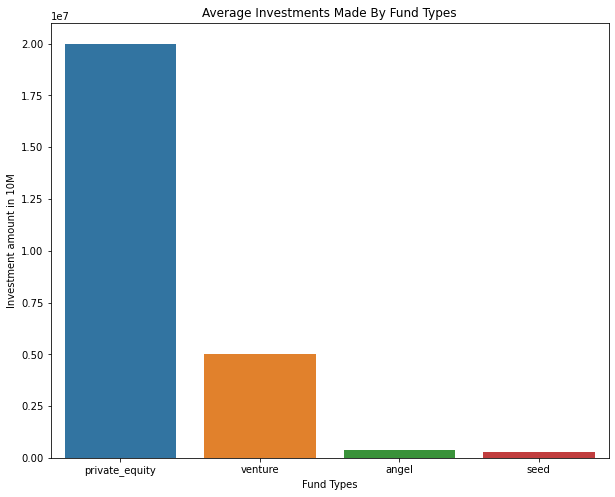

In [294]:
plt.figure(figsize = (10,8))
objects = master_frame_ft_group['raised_amount_usd']
y_pos = np.arange(len(objects))
sns.barplot(y_pos, master_frame_ft_group['raised_amount_usd'])
plt.xticks(y_pos, master_frame_ft_group.index)
plt.ylabel('Investment amount in 10M')
plt.xlabel('Fund Types')
plt.title('Average Investments Made By Fund Types')
plt.show()

### By the above chart we can identify is Venture Funds have Median investment of around 5 Million which is exactly suitable for Spark Funds

## A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

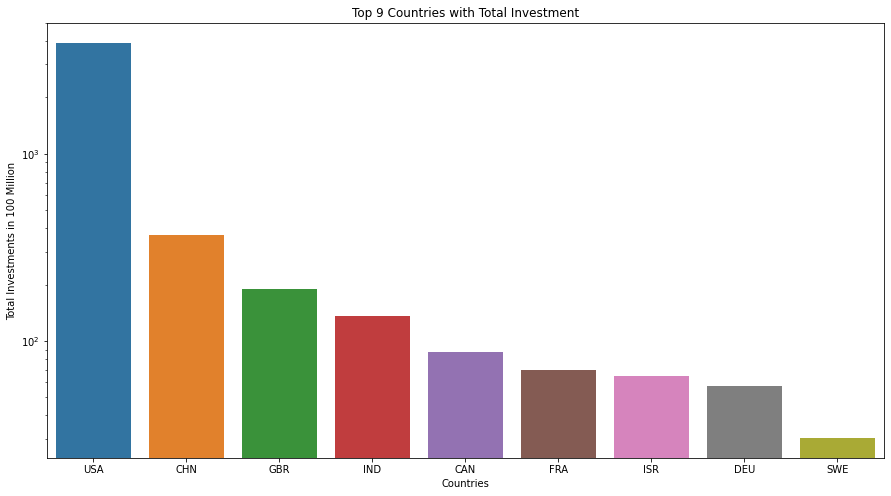

In [295]:
plt.figure (figsize=(15,8))
x_axis = country_wise_total.head(9).index
y_axis = country_wise_total.head(9).values/100000000
# objects = country_wise_total.head(9).values
# y_axis = np.arange(len(objects))
sns.barplot(x = x_axis, y = y_axis,)
plt.xlabel('Countries')
plt.ylabel('Total Investments in 100 Million')
plt.yscale('log')
plt.title('Top 9 Countries with Total Investment')
plt.show()

### By above visuals we can conclude that USA, Great Britan & India are the 3 most heavly invested English speaking countries 

## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [296]:
# Top 3 country filtered by top 5 sectors

top3_country_sector = top3_country[top3_country.primary_sector.isin(['Biotechnology'
                                                         ,'Software'
                                                         ,'Advertising'
                                                         ,'E-Commerce'
                                                         ,'Curated Web'
                                                        ])
                      ]
top3_country_sector

,permalink,name,status,country_code,funding_round_type,funded_at,raised_amount_usd,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
90,/organization/abilto,AbilTo,operating,USA,venture,18-03-2014,6000000,Curated Web,0,0,0,0,0,0,1,0,0
91,/organization/abilto,AbilTo,operating,USA,venture,09-06-2015,12000000,Curated Web,0,0,0,0,0,0,1,0,0
93,/organization/abine,Abine,operating,USA,venture,12-07-2011,6467283,Curated Web,0,0,0,0,0,0,1,0,0
94,/organization/aboutme,about.me,operating,USA,venture,10-06-2014,11000000,Curated Web,0,0,0,0,0,0,1,0,0
95,/organization/aboutme,about.me,operating,USA,venture,05-02-2013,5675000,Curated Web,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24077,/organization/zoove,Zoove,acquired,USA,venture,20-10-2011,5000000,Advertising,0,0,0,0,0,0,0,0,1
24078,/organization/zoove,Zoove,acquired,USA,venture,20-06-2006,6800000,Advertising,0,0,0,0,0,0,0,0,1
24080,/organization/zoove,Zoove,acquired,USA,venture,15-09-2009,13000000,Advertising,0,0,0,0,0,0,0,0,1
24082,/organization/zoove,Zoove,acquired,USA,venture,14-05-2013,15000000,Advertising,0,0,0,0,0,0,0,0,1


In [297]:
top3_country_sector_pivot = pd.pivot_table(data = top3_country_sector, index = "country_code"
                                           ,columns = "primary_sector"
                                           ,values = "raised_amount_usd",aggfunc = sum)
top3_country_sector_pivot

primary_sector,Advertising,Biotechnology,Curated Web,E-Commerce,Software
country_code,,,,,
GBR,306794581,636958624,127476377,262637742,383817324
IND,50000000,73530000,110178770,343869507,163050000
USA,5870184347,13406336046,2604010608,2381508892,9125717374


In [298]:
usa_sector_pivot = pd.pivot_table(data = top3_country_sector, index = "country_code"
                                           ,columns = "primary_sector"
                                           ,values = "raised_amount_usd",aggfunc = sum)
top3_country_sector_pivot

primary_sector,Advertising,Biotechnology,Curated Web,E-Commerce,Software
country_code,,,,,
GBR,306794581,636958624,127476377,262637742,383817324
IND,50000000,73530000,110178770,343869507,163050000
USA,5870184347,13406336046,2604010608,2381508892,9125717374


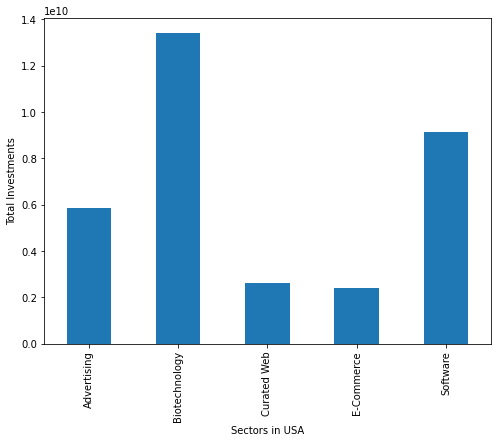

In [299]:
top3_country_sector_pivot.loc['USA'].plot(kind = "bar",stacked = "True",figsize=[8,6],logy  = False)
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.xlabel('Sectors in USA')
plt.ylabel('Total Investments')
plt.show()

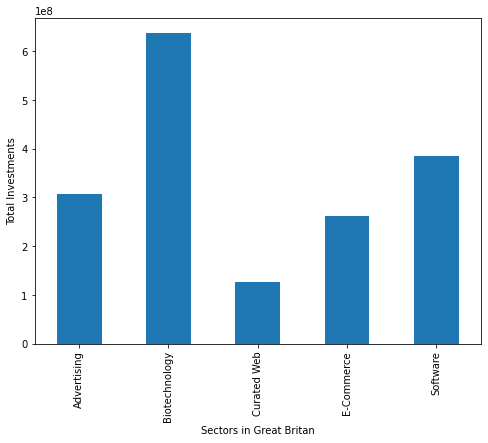

In [300]:
top3_country_sector_pivot.loc['GBR'].plot(kind = "bar",stacked = "True",figsize=[8,6],logy  = False)
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.xlabel('Sectors in Great Britan')
plt.ylabel('Total Investments')
plt.show()

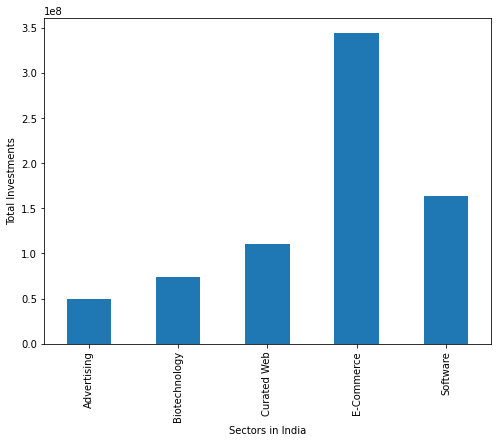

In [301]:
top3_country_sector_pivot.loc['IND'].plot(kind = "bar",stacked = "True",figsize=[8,6],logy  = False)
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.xlabel('Sectors in India')
plt.ylabel('Total Investments')
plt.show()